In [1]:
from data_utils import *
from util import *

In [2]:
# @markdown config

config = {
    'dev_directory': 'D:/dcase/dev_data_tmp',
    'eval_directory': 'D:/dcase/eval_data',


    'max_fpr': 0.1,
    'decision_threshold': 0.9,
    'ext': 'wav',

    'training': {
        'learning_rate': 0.001,
        'num_epochs' : 100,
        # 'batch_size' : 512,
        'shuffle' : True,
        'validation_split' : 0.1,
        'weight_decay': 0.0,
        'lr_step_size': 50,
        'lr_gamma': 0.5,
        # 'verbose' : 1,
    },

    ########### machine config ###########
    'ToyCar': {
        'batch_size': 1,
        'input_samples': 16000,
        'n_mels': 128,
        'n_frames': 313,
        'n_hop_frames': 313,
        'n_fft': 1024,
        'hop_length': 512,
        'power': 2.0,
    },
}

In [3]:
files, labels = file_list_generator(target_dir='D:/dcase/dev_data_tmp/ToyCar/',
                                    section_name='*',
                                    dir_name='train',
                                    mode='dev')

dcase_dataset = DcaseDataset(files,
                                labels,
                                config=config,
                                machine_config=config['ToyCar'],
                                transform=None)
                                


target_dir : D:/dcase/dev_data_tmp/ToyCar/_*
Number of audio files : 4


4it [00:04,  1.10s/it]

Feature Shape: (4, 1, 128, 313)


In [4]:
data_loader = {'train': None, 'val': None}

data_loader['train'], data_loader['val'] = get_dataloader(dcase_dataset,
                                                            config=config,
                                                            machine_type='ToyCar')

train size: 3, val_size: 0


In [5]:
len(data_loader['train'])

3

In [6]:
for x, y, z in data_loader['train']:
    break


In [7]:
x.shape

torch.Size([1, 1, 128, 313])

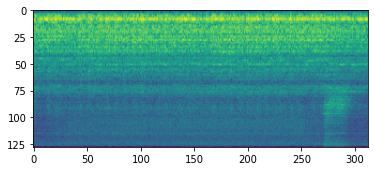

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x[0,0,:,:])